In [81]:
import imports as i
import functions as f
import preprocessing as pp
import neuralnetworks as nn 

In [76]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test_masked.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


In [77]:
X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

## PREPROCESSING FUNCTIONS

In [79]:
# BASIC PREPROCESSING
train_set_clean, l = pp.basic_preprocess(X_train)
test_set_clean, l = pp.basic_preprocess(X_test)
#### POSSIBILITIES
# REMOVE STOP WORDS
train_set_clean = pp.remove_stop_words(train_set_clean)
test_set_clean = pp.remove_stop_words(test_set_clean)
# GRAMMAR CORRECTION
train_set_clean = pp.grammar_corrector(train_set_clean)
test_set_clean = pp.grammar_corrector(test_set_clean)

## Neural Network INIT

In [80]:
# convert labels
sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)
# Tokenizer
tokenizer = pp.tokenizer_init(train_set_clean, test_set_clean)
Train = tokenizer.texts_to_sequences(train_set_clean)
Test = tokenizer.texts_to_sequences(test_set_clean)
# Sequencer 
X_train_p = pp.sequence_pad(Train) # there are several attributes which can be defined, basic = first 50 words 
X_test = pp.sequence_pad(Test)

# Train RNN with Early stopping

In [86]:
# SHITTY DUMMY SAMPLING

X_train_p = X_train_p[1000:6000]
y_train = y_train[1000:6000]
X_test = X_test[1000:6000]
y_test = y_test[1000:6000]

# TRAIN 
history, model = nn.RNN_train(X_train_p, y_train, X_test, y_test, tokenizer)
# model is the model 

Epoch 1/10
100/100 [==============================] - 16s 148ms/step - loss: 0.6631 - accuracy: 0.6606 - val_loss: 0.6988 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.4721 - accuracy: 0.7882
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
100/100 [==============================] - 16s 156ms/step - loss: 0.4721 - accuracy: 0.7882 - val_loss: 0.5873 - val_accuracy: 0.7506 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.9068
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
100/100 [==============================] - 17s 165ms/step - loss: 0.2499 - accuracy: 0.9068 - val_loss: 0.4696 - val_accuracy: 0.8288 - lr: 2.0000e-04
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 0.1552 - accuracy: 0.9476Restoring model weights from the end of the best epoch: 3.

Epoch 4: ReduceLROnPlateau reducing learnin

0.8288


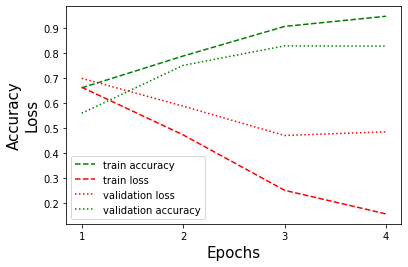

In [90]:
# accuracy score
result = i.np.round(model.predict(X_test)) # use model from the previous step
print(i.accuracy_score(y_test, result))
# plotting 
f.plot_model_history(history)

In [92]:
history.history['val_accuracy']

[0.5587999820709229,
 0.7505999803543091,
 0.8288000226020813,
 0.8277999758720398]

## Lemmatizer

In [ ]:
import nltk
nltk.download("wordnet") 
from nltk.stem import WordNetLemmatizer

# TODO OUGHT TO CHANGE EVERYTHING TO LOWER CASE  !!!!
def lemmatize_token_listlist(token_listlist, reassembleSntcs): 
    wnl = WordNetLemmatizer()
    if reassembleSntcs: 
        lemmatized_tokensentence_list = []
        for tokenlist in token_listlist: lemmatized_tokensentence_list.append(' '.join([wnl.lemmatize(tokens) for tokens in tokenlist]))
        return lemmatized_tokensentence_list
    else: 
        lemmatized_token_listlist = []
        for tokenlist in token_listlist: 
            lemmatized_token_listlist.append([wnl.lemmatize(tokens) for tokens in tokenlist])
    return lemmatized_token_listlist

# POS-tagger

In [ ]:
# https://www.nltk.org/api/nltk.tag.html
from nltk import pos_tag, word_tokenize
nltk.download('averaged_perceptron_tagger')

#only works for english
def pos_tag_stringlist(strlist, shouldTokenize):
    pos_tagged_strlist = []
    if shouldTokenize: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(word_tokenize(str)))
    else: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(str))
    return pos_tagged_strlist

# STEPS

In [ ]:
# define the two model
### baseline, Hugging Face

In [ ]:
# LOG the results in pandas Dataframe

In [2]:
# STEPS ORDER for Preprocessing
# 1. Basic preprocessing - Should be the first step
# 2. Grammar Correction
# 3. Simplify Contractions
# 4. Lemmatize 
# 5. Remove stop words

In [17]:
# TODO: 
# 2. Define the technical parameters of the basic NN
## post tagging 
## 10k same sentence 
## first 50 word
## 
#### BASE RNN vs Hugging Face 
# simple pandas dataframe - Columns are preproc methods, 1,0,1, accuracy, etc  
# 4. Best vs Worst Accuracy settings test on bigger corpus # Bigger test, Train? Dev set ?

In [18]:
# Grid search

In [69]:
def grid_search(str_list):
    simp_contr = [0, 1]
    gram_cor = [0, 1]
    simp_neg = [0, 1]
    lemma = [0, 1]
    rem_stop = [0, 1]
    list_of_data = []
    for z in simp_contr:
        for x in gram_cor:
            for c in simp_neg:
                for v in lemma:
                    for b in rem_stop:
                        data = str_list
                        if z == 1:
                            data = f.simplify_contraction(data)
                        #data = pp.basic_preprocess(data)
                        if x == 1:
                            data = data #grammar_correction(data)
                        if c == 1:
                            data = f.simplify_negation(data)
                        if v == 1:
                            data = f.lemmatize_sentencelist(data)
                        if b == 1:
                            data = pp.remove_stop_words(data)
                        list_of_data.append([[z, x, c, v, b], data])
    return list_of_data

In [70]:
data_sets = grid_search(X_train[0:2])
print(data_sets)

[[[0, 0, 0, 0, 0], ['So creative!  Love his music - the words, the message! Some of my favorite songs on this CD. I should have bought it years ago!', 'This tape can hardly be understood and it was listed for sale as "very good".  It\'s VERY BAD.']], [[0, 0, 0, 0, 1], [['So', 'creative!', 'Love', 'music', '-', 'words,', 'message!', 'Some', 'favorite', 'songs', 'CD.', 'I', 'bought', 'years', 'ago!'], ['This', 'tape', 'hardly', 'understood', 'listed', 'sale', '"very', 'good".', "It's", 'VERY', 'BAD.']]], [[0, 0, 0, 1, 0], ['So creative!  Love his music - the words, the message! Some of my favorite song on this CD. I should have bought it year ago!', 'This tape can hardly be understood and it wa listed for sale a "very good".  It\'s VERY BAD.']], [[0, 0, 0, 1, 1], [['So', 'creative!', 'Love', 'music', '-', 'words,', 'message!', 'Some', 'favorite', 'song', 'CD.', 'I', 'bought', 'year', 'ago!'], ['This', 'tape', 'hardly', 'understood', 'wa', 'listed', 'sale', '"very', 'good".', "It's", 'VER

In [6]:
print(X_train[:500])

['So creative!  Love his music - the words, the message! Some of my favorite songs on this CD. I should have bought it years ago!', 'This tape can hardly be understood and it was listed for sale as "very good".  It\'s VERY BAD.', "Buy the CD.  Do not buy the MP3 album.  Download is no longer available.  But you don't find that out until after you have purchased it.", 'I love Dallas Holms music and voice!  Thank You!  I will be attending all his concerts in heaven, forever!', 'Great memories of my early years in Christ', 'I have been listening to this album set my ENTIRE life (30 years!) I remember hearing this CD on repeat every night as a toddler, and it brought me comfort to sleep, as I always had to have some music or a fan to rest. Well worth it for relaxation!', 'I love all of his music!!', 'Love Talbot music very inspiring and since this was a gift, I just have to buy it for myself soon.', 'Most unique  sound.  Nothing  even  similar  among  praise music  choices.  Truly  real  a

In [11]:
print(data_sets[1])

[[0, 0, 0, 0, 1], ([[['So', 'creative', '!', 'Love', 'his', 'music', 'words', 'message', '!', 'Some', 'of', 'my', 'favorite', 'songs', 'on', 'this', 'CD', '.', 'I', 'should', 'have', 'bought', 'it', 'years', 'ago', '!'], ['This', 'tape', 'can', 'hardly', 'be', 'understood', 'and', 'it', 'was', 'listed', 'for', 'sale', 'as', 'very', 'good', '.', 'It', 's', 'VERY', 'BAD', '.'], ['Buy', 'CD', '.', 'Do', 'not', 'buy', 'MP', 'album', '.', 'Download', 'is', 'no', 'longer', 'available', '.', 'But', 'you', 'don', 't', 'find', 'that', 'out', 'until', 'after', 'you', 'have', 'purchased', 'it', '.'], ['I', 'love', 'Dallas', 'Holms', 'music', 'and', 'voice', '!', 'Thank', 'You', '!', 'I', 'will', 'be', 'attending', 'all', 'his', 'concerts', 'in', 'heaven', 'forever', '!'], ['Great', 'memories', 'of', 'my', 'early', 'years', 'in', 'Christ'], ['I', 'have', 'been', 'listening', 'to', 'this', 'album', 'set', 'my', 'ENTIRE', 'life', 'years', '!', 'I', 'remember', 'hearing', 'this', 'CD', 'on', 'repeat'

In [12]:
print(data_sets[0])

[[0, 0, 0, 0, 0], ([['So', 'creative', '!', 'Love', 'his', 'music', 'words', 'message', '!', 'Some', 'of', 'my', 'favorite', 'songs', 'on', 'this', 'CD', '.', 'I', 'should', 'have', 'bought', 'it', 'years', 'ago', '!'], ['This', 'tape', 'can', 'hardly', 'be', 'understood', 'and', 'it', 'was', 'listed', 'for', 'sale', 'as', 'very', 'good', '.', 'It', 's', 'VERY', 'BAD', '.'], ['Buy', 'CD', '.', 'Do', 'not', 'buy', 'MP', 'album', '.', 'Download', 'is', 'no', 'longer', 'available', '.', 'But', 'you', 'don', 't', 'find', 'that', 'out', 'until', 'after', 'you', 'have', 'purchased', 'it', '.'], ['I', 'love', 'Dallas', 'Holms', 'music', 'and', 'voice', '!', 'Thank', 'You', '!', 'I', 'will', 'be', 'attending', 'all', 'his', 'concerts', 'in', 'heaven', 'forever', '!'], ['Great', 'memories', 'of', 'my', 'early', 'years', 'in', 'Christ'], ['I', 'have', 'been', 'listening', 'to', 'this', 'album', 'set', 'my', 'ENTIRE', 'life', 'years', '!', 'I', 'remember', 'hearing', 'this', 'CD', 'on', 'repeat',